In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import pandas as pd

In [2]:
data =  pd.read_csv('../../../Data/pv_power_df_5day_capacity_scaled.csv', index_col='datetime') #.drop(columns=['2657', '2828']) #DROPPING FAULTY SYSTEMS
uk_pv = pd.read_csv('../../../Data/system_metadata_location_rounded.csv')
uk_pv['ss_id_string'] = uk_pv['ss_id'].astype('str')

array([[<AxesSubplot:title={'center':'ss_id'}>,
        <AxesSubplot:title={'center':'latitude_rounded'}>,
        <AxesSubplot:title={'center':'longitude_rounded'}>],
       [<AxesSubplot:title={'center':'orientation'}>,
        <AxesSubplot:title={'center':'tilt'}>,
        <AxesSubplot:title={'center':'kwp'}>],
       [<AxesSubplot:title={'center':'latitude_noisy'}>,
        <AxesSubplot:title={'center':'longitude_noisy'}>, <AxesSubplot:>]],
      dtype=object)

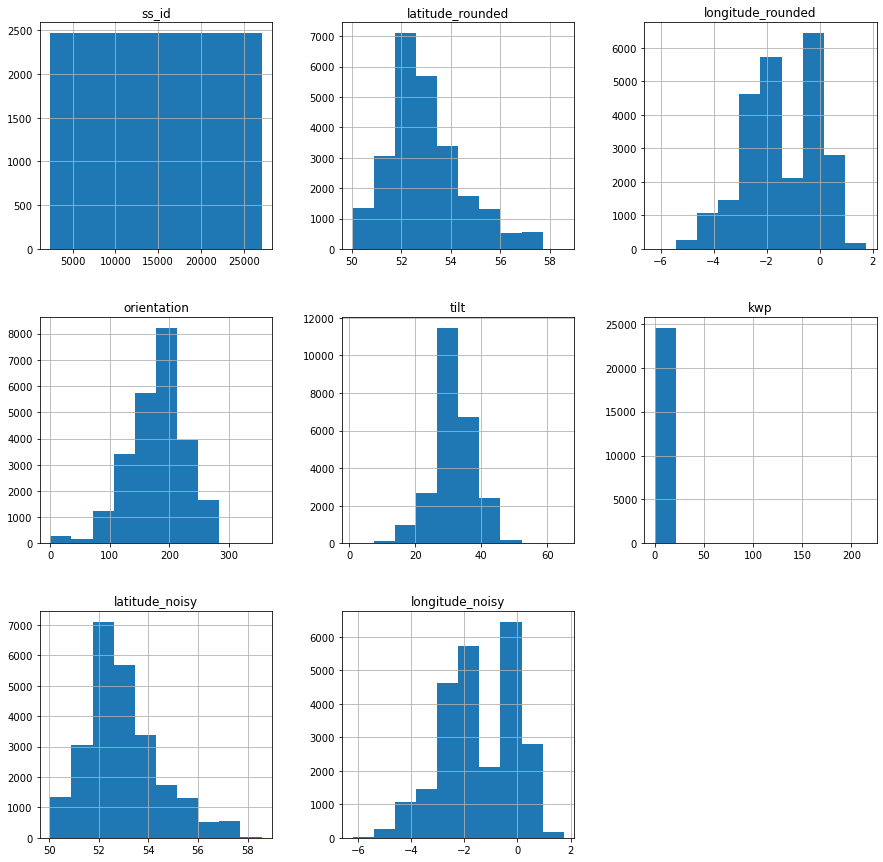

In [3]:
uk_pv.hist(figsize=(15,15))

In [21]:
key_stats = uk_pv.set_index('ss_id_string')[['orientation', 'tilt', 'kwp']]
key_stats['avg_gen'] = data.mean()
key_stats = key_stats.dropna()
key_stats.columns = ['Orientation', 'Tilt', 'Capacity', 'Average Generation']

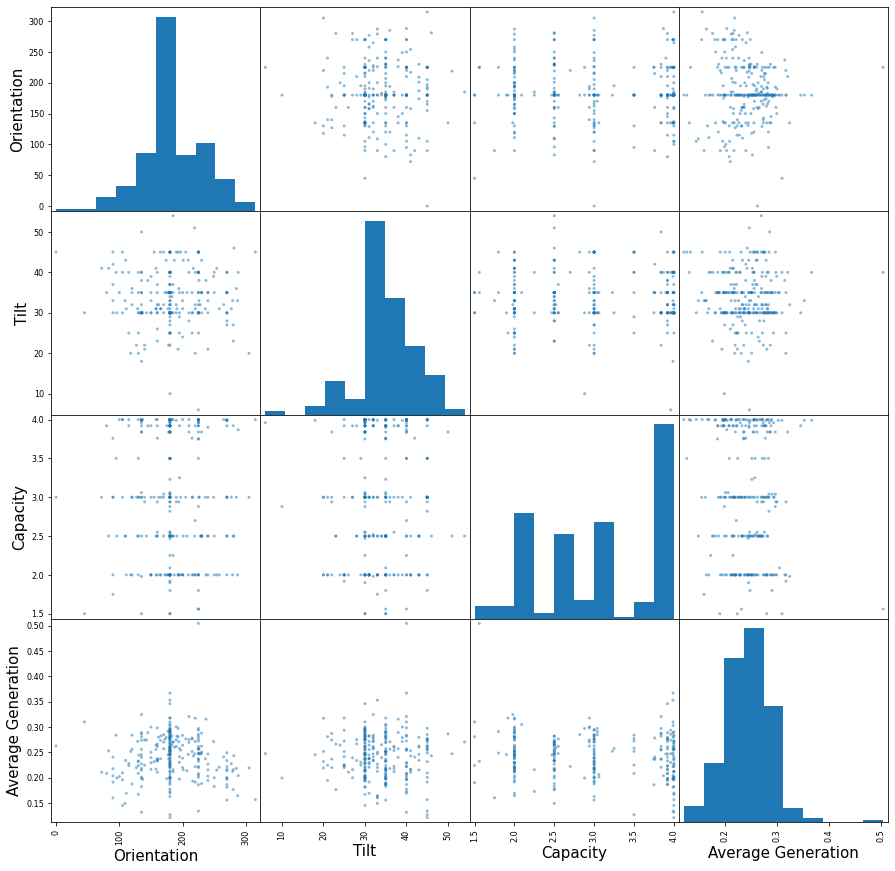

In [24]:
m = pd.plotting.scatter_matrix(key_stats, figsize=(15,15))
for ax in m.ravel():
    ax.set_xlabel(ax.get_xlabel(), fontsize = 15)
    ax.set_ylabel(ax.get_ylabel(), fontsize = 15)

In [7]:
import statsmodels.api as sm

X = key_stats.iloc[:, :-1]
Y = key_stats.iloc[:, -1]
mod = sm.OLS(Y, sm.add_constant(X, prepend=False), )
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                avg_gen   R-squared:                       0.014
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     1.283
Date:                Tue, 09 Aug 2022   Prob (F-statistic):              0.281
Time:                        15:55:55   Log-Likelihood:                 462.90
No. Observations:                 271   AIC:                            -917.8
Df Residuals:                     267   BIC:                            -903.4
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
orientation -4.159e-05   5.64e-05     -0.737      